# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [2]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [3]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [4]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [5]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

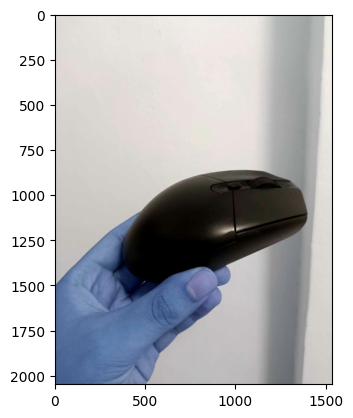

In [6]:
img_path = "image.jpg"
plt.imshow(cv2.imread(img_path))

Use VGG-16 pre-trained model

In [7]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc1 (Dense)                     │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc2 (Dense)                     │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ predictions (Dense)             │ (None, 1000)              │  4,097,000 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [8]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [9]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


,Predicted Class,Name,Probability
0,n03793489,mouse,0.589655
1,n03777754,modem,0.116092
2,n03602883,joystick,0.096715
3,n03908714,pencil_sharpener,0.065646
4,n04074963,remote_control,0.036637
5,n03483316,hand_blower,0.023428
6,n02992529,cellular_telephone,0.011426
7,n03657121,lens_cap,0.008734
8,n04517823,vacuum,0.005299
9,n03995372,power_drill,0.004284


Interpret the result of prediction using VGG16 model

#type your answer here

Use Resnet50 pretrained model

In [10]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_pad           │ (None, 230, 230,  │       0 │ input_layer_1[0][0]  │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │   9,472 │ conv1_pad[0][0]      │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_bn            │ (None, 112, 112,  │     256 │ conv1_conv[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_relu          │ (None, 112, 112,  │       0 │ conv1_bn[0][0]       │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pad           │ (None, 114, 114,  │       0 │ conv1_relu[0][0]     │
│ (ZeroPadding2D)     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pool          │ (None, 56, 56,    │       0 │ pool1_pad[0][0]      │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │   4,160 │ pool1_pool[0][0]     │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │     256 │ conv2_block1_1_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │       0 │ conv2_block1_1_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │  36,928 │ conv2_block1_1_relu… │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │     256 │ conv2_block1_2_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │       0 │ conv2_block1_2_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │  16,640 │ pool1_pool[0][0]     │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │  16,640 │ conv2_block1_2_relu… │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │   1,024 │ conv2_block1_0_conv… │
│ (BatchNormalizatio… │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │   1,024 │ conv2_block1_3_conv

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [11]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,Predicted Class,Name,Probability
0,n03793489,mouse,0.978494
1,n03777754,modem,0.018174
2,n04074963,remote_control,0.001304
3,n03483316,hand_blower,0.000490
4,n04517823,vacuum,0.000204
5,n04254120,soap_dispenser,0.000132
6,n03794056,mousetrap,0.000118
7,n03127747,crash_helmet,0.000116
8,n03602883,joystick,0.000116
9,n02747177,ashcan,0.000112


Interpret the result using RESNET50 pretrained model

#type your answer here

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

First model: xception

In [12]:
#### type your code here
from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv1        │ (None, 149, 149,  │     864 │ input_layer_2[0][0]  │
│ (Conv2D)            │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │     128 │ block1_conv1[0][0]   │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │       0 │ block1_conv1_bn[0][… │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv2        │ (None, 147, 147,  │  18,432 │ block1_conv1_act[0]… │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │     256 │ block1_conv2[0][0]   │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │       0 │ block1_conv2_bn[0][… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │   8,768 │ block1_conv2_act[0]… │
│ (SeparableConv2D)   │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │     512 │ block2_sepconv1[0][… │
│ (BatchNormalizatio… │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │       0 │ block2_sepconv1_bn[… │
│ (Activation)        │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │  17,536 │ block2_sepconv2_act… │
│ (SeparableConv2D)   │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │     512 │ block2_sepconv2[0][… │
│ (BatchNormalizatio… │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │   8,192 │ block1_conv2_act[0]… │
│                     │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_pool         │ (None, 74, 74,    │       0 │ block2_sepconv2_bn[… │
│ (MaxPooling2D)      │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalization │ (None, 74, 74,    │     512 │ conv2d[0][0]         │
│ (BatchNormalizatio… │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ add (Add)           │ (None, 74, 74,    │       0 │ block2_pool[0][0],   │
│                     │ 128)              │         │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │       0 │ add[0][0]          

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [13]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions, (299, 299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


,Predicted Class,Name,Probability
0,n03793489,mouse,0.872320
1,n03483316,hand_blower,0.016516
2,n03602883,joystick,0.015823
3,n04517823,vacuum,0.007054
4,n04074963,remote_control,0.006902
5,n03908714,pencil_sharpener,0.002094
6,n02992529,cellular_telephone,0.001668
7,n03759954,microphone,0.001616
8,n03777754,modem,0.001398
9,n03794056,mousetrap,0.001304


Model 2: VGG19

In [18]:
from keras.applications import efficientnet_v2

EfficientNetV2L_model = efficientnet_v2.EfficientNetV2L(weights='imagenet')


In [15]:
predict_image(EfficientNetV2L_model, img_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions, (480, 480))

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


,Predicted Class,Name,Probability
0,n03793489,mouse,0.731547
1,n03794056,mousetrap,0.021844
2,n03602883,joystick,0.018925
3,n04074963,remote_control,0.005302
4,n03085013,computer_keyboard,0.003472
5,n03777754,modem,0.003076
6,n03908714,pencil_sharpener,0.001677
7,n04517823,vacuum,0.001625
8,n03180011,desktop_computer,0.001424
9,n02992529,cellular_telephone,0.001347


Model 3: NasNetLarge

In [19]:
from keras.applications import nasnet

nasnetlarge_model = nasnet.NASNetLarge(weights='imagenet')


In [17]:
predict_image(nasnetlarge_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions, (331, 331))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


,Predicted Class,Name,Probability
0,n03793489,mouse,0.829151
1,n03794056,mousetrap,0.012496
2,n03602883,joystick,0.002692
3,n03085013,computer_keyboard,0.001066
4,n03180011,desktop_computer,0.000854
5,n03777754,modem,0.000779
6,n09399592,promontory,0.000679
7,n04074963,remote_control,0.000673
8,n04517823,vacuum,0.000634
9,n04372370,switch,0.000597


**Compare results of the three models used**: <br>
The first model I used is Xception Model. The model predicted correctly which is it is a mouse. It had a probability of 0.872320. The next application I used is EfficientNetV2L Model it predicted mouse with the accuracy of 0.731547. Lastly NasNetLarge Model, it predicted correctly with an accuracy of 0.829151

Conclusion

This activity taught me how to use existing CNN architectures which I can utilize to predict objects in an image. This is a great learning because these are models that are optimized by experts. Resizing it would be crucial in order for the model to perform well and predict correctly. This activity also familiarized me with different libraries available in keras. Getting the correct preprocess input and decode predictions are necessary for the model to predict. Overall, this is a fun learning experience that could help us with our future projects.